# Superstore Sales Analysis

Data Exploration

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import os,sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
df=pd.read_csv("train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
df.shape

(9800, 18)

In [7]:
null_count=df["Postal Code"].isnull().sum()
null_count

11

In [8]:
#filling empty column
#float to integer
df["Postal Code"].fillna(0,inplace=True)
df["Postal Code"]=df["Postal Code"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int32  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [9]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [10]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55211.280918,230.769059
std,2829.160653,32076.677954,626.651875
min,1.000000,0.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


# Data cleaning

In [11]:
#duplicate checking
if df.duplicated().sum()>0:
    print("Duplicate present")
else:
    print("Not present")

Not present


In [12]:
df.duplicated(keep=False).sum()

0

In [13]:
#missing value
df.isnull().sum()/df.shape[0]*100

Row ID           0.0
Order ID         0.0
Order Date       0.0
Ship Date        0.0
Ship Mode        0.0
Customer ID      0.0
Customer Name    0.0
Segment          0.0
Country          0.0
City             0.0
State            0.0
Postal Code      0.0
Region           0.0
Product ID       0.0
Category         0.0
Sub-Category     0.0
Product Name     0.0
Sales            0.0
dtype: float64

# Exploratory data analysis

Customer segmentation

In [14]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [15]:
#types of customer
types_of_customer=df["Segment"].unique()
types_of_customer

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [16]:
number_of_customer=df["Segment"].value_counts().reset_index()
number_of_customer.rename(columns={"count":"total"},inplace=True)

Text(0.5, 1.0, 'Customer distribution')

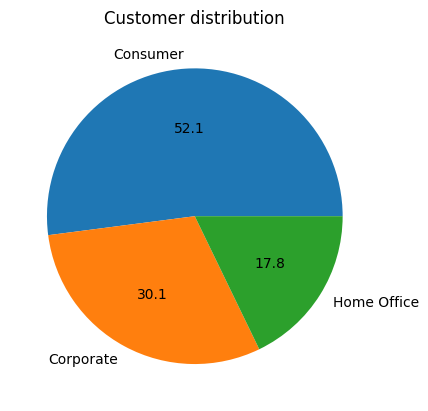

In [17]:
plt.pie(number_of_customer["total"],labels=number_of_customer["Segment"],autopct="%1.1f")
plt.title("Customer distribution")

# Sales per customer segment

In [18]:
sales_per_customer=df.groupby("Segment")["Sales"].sum().reset_index()

In [19]:
sales_per_customer.rename(columns={"Segment":"Customer Types","Sales":"Total sale"},inplace=True)

Text(0.5, 1.0, 'Sales per Customer category')

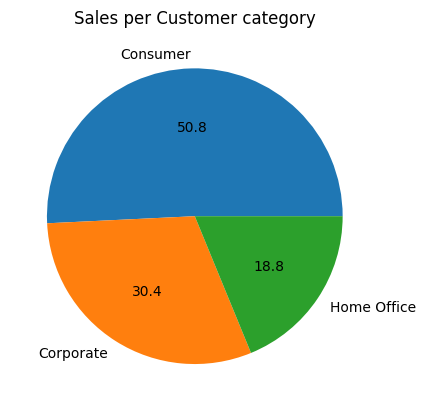

In [20]:
plt.pie(sales_per_customer["Total sale"],labels=sales_per_customer["Customer Types"],autopct="%1.1f")
plt.title("Sales per Customer category")

Text(0.5, 1.0, 'sales_per_customer')

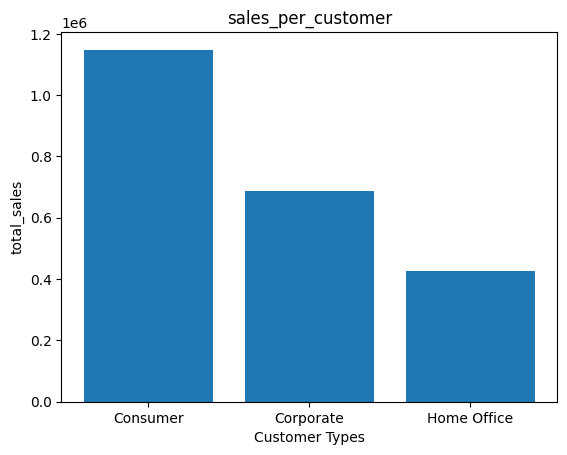

In [21]:
plt.bar(sales_per_customer["Customer Types"],sales_per_customer["Total sale"])
plt.ylabel("total_sales")
plt.xlabel("Customer Types")
plt.title("sales_per_customer")

# Customer loylalty

In [22]:
customer_order_frequency=df.groupby(["Customer ID","Customer Name","Segment"])["Order ID"].count().reset_index()
customer_order_frequency.rename(columns={"Order ID":"Total Orders"},inplace=True)
repeat_customers=customer_order_frequency[customer_order_frequency["Total Orders"]>=1]
sorted_repeated_customer=repeat_customers.sort_values(by="Total Orders",ascending=False)
sorted_repeated_customer.head(10).reset_index(drop=True)

,Customer ID,Customer Name,Segment,Total Orders
0,WB-21850,William Brown,Consumer,35
1,PP-18955,Paul Prost,Home Office,34
2,MA-17560,Matt Abelman,Home Office,34
3,JL-15835,John Lee,Consumer,33
4,CK-12205,Chloris Kastensmidt,Consumer,32
5,SV-20365,Seth Vernon,Consumer,32
6,JD-15895,Jonathan Doherty,Corporate,32
7,AP-10915,Arthur Prichep,Consumer,31
8,ZC-21910,Zuschuss Carroll,Consumer,31
9,EP-13915,Emily Phan,Consumer,31


In [23]:
#Group data based on : Customer ID,Customer name and sales
customer_sales=df.groupby(["Customer ID","Customer Name","Segment"])["Sales"].sum().reset_index()
#sort in descending order
top_sender=customer_sales.sort_values(by="Sales",ascending=False)
print(top_sender.head(10).reset_index(drop=True))

  Customer ID       Customer Name      Segment      Sales
0    SM-20320         Sean Miller  Home Office  25043.050
1    TC-20980        Tamara Chand    Corporate  19052.218
2    RB-19360        Raymond Buch     Consumer  15117.339
3    TA-21385        Tom Ashbrook  Home Office  14595.620
4    AB-10105       Adrian Barton     Consumer  14473.571
5    KL-16645        Ken Lonsdale     Consumer  14175.229
6    SC-20095        Sanjit Chand     Consumer  14142.334
7    HL-15040        Hunter Lopez     Consumer  12873.298
8    SE-20110        Sanjit Engle     Consumer  12209.438
9    CC-12370  Christopher Conant     Consumer  12129.072


# Mode of Shipping

In [24]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [25]:
types_of_shipping=df["Ship Mode"].unique()
types_of_shipping

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [26]:
#frequency use of shipping methods
shipping_mode= df["Ship Mode"].value_counts().reset_index()
shipping_mode.rename(columns={"Ship Mode":"Mode of Shipping","count":"Use Frequency"},inplace=True)
shipping_mode

,Mode of Shipping,Use Frequency
0,Standard Class,5859
1,Second Class,1902
2,First Class,1501
3,Same Day,538


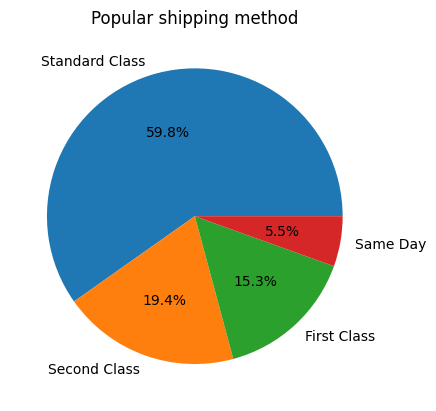

In [27]:
plt.pie(shipping_mode["Use Frequency"],labels=shipping_mode["Mode of Shipping"],autopct="%1.1f%%")
plt.title("Popular shipping method")
plt.show()

# Graphical analysis


In [28]:
state=df["State"].value_counts().reset_index()
state=state.rename(columns={"index":"State","count":"Number of customers"})
state.head(5)

,State,Number of customers
0,California,1946
1,New York,1097
2,Texas,973
3,Pennsylvania,582
4,Washington,504


In [29]:
state=df["City"].value_counts().reset_index()
state=state.rename(columns={"index":"City","count":"Number of customers"})
state.head(5)

,City,Number of customers
0,New York City,891
1,Los Angeles,728
2,Philadelphia,532
3,San Francisco,500
4,Seattle,426


In [30]:
#sales per state
state_slaes=df.groupby(["State"])["Sales"].sum().reset_index()
top_sales=state_slaes.sort_values(by= "Sales",ascending=False)
top_sales.reset_index(drop=True)

,State,Sales
0,California,446306.4635
1,New York,306361.1470
2,Texas,168572.5322
3,Washington,135206.8500
4,Pennsylvania,116276.6500
5,Florida,88436.5320
6,Illinois,79236.5170
7,Michigan,76136.0740
8,Ohio,75130.3500
9,Virginia,70636.7200


# Product Analysis

In [31]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [32]:
product_category=df["Category"].unique()
product_category

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [33]:
#group data by product category
subcategory_count=df.groupby("Category")["Sub-Category"].nunique().reset_index()
subcategory_count=subcategory_count.sort_values(by="Sub-Category",ascending=False)
subcategory_count.reset_index(drop=True)

,Category,Sub-Category
0,Office Supplies,9
1,Furniture,4
2,Technology,4


In [34]:
#sales per each category
category_sales=df.groupby(["Category"])["Sales"].sum().reset_index()
category_sales.sort_values(by="Sales",ascending=False,inplace=True)
category_sales.reset_index(drop=True)

,Category,Sales
0,Technology,827455.8730
1,Furniture,728658.5757
2,Office Supplies,705422.3340


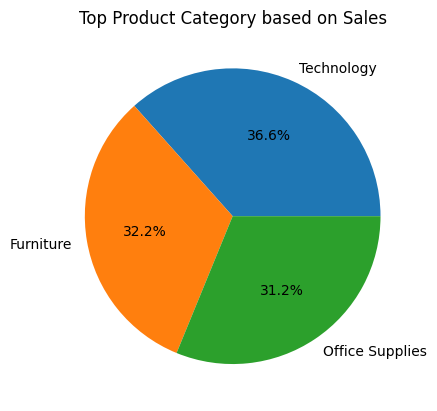

In [35]:
plt.pie(category_sales["Sales"],labels=category_sales["Category"],autopct="%1.1f%%")
plt.title("Top Product Category based on Sales")
plt.show()

In [36]:
#Group data by product sub -category vs sales
pdt_subcategory=df.groupby(["Sub-Category"])["Sales"].sum().reset_index()
top_pdt_subcategory=pdt_subcategory.sort_values(by="Sales",ascending=False)
top_pdt_subcategory

,Sub-Category,Sales
13,Phones,327782.4480
5,Chairs,322822.7310
14,Storage,219343.3920
16,Tables,202810.6280
3,Binders,200028.7850
11,Machines,189238.6310
0,Accessories,164186.7000
6,Copiers,146248.0940
4,Bookcases,113813.1987
1,Appliances,104618.4030


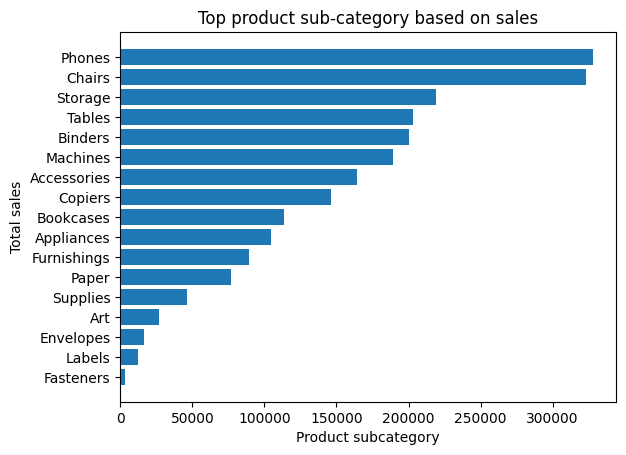

In [37]:
top_pdt_subcategory=top_pdt_subcategory.sort_values(by="Sales",ascending=True)
#plotting bar graph
plt.barh(top_pdt_subcategory["Sub-Category"],top_pdt_subcategory["Sales"])
plt.title("Top product sub-category based on sales")
plt.xlabel("Product subcategory")
plt.ylabel("Total sales")
plt.show()

# Sales

In [38]:
#convert order date to date time format
df["Order Date"]=pd.to_datetime(df["Order Date"],dayfirst=True)
yearly_sales=df.groupby(df["Order Date"].dt.year)["Sales"].sum()
yearly_sales=yearly_sales.reset_index()
yearly_sales=yearly_sales.rename(columns={"Order Date":"Year","Sales":"Total Sale"})
yearly_sales


,Year,Total Sale
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


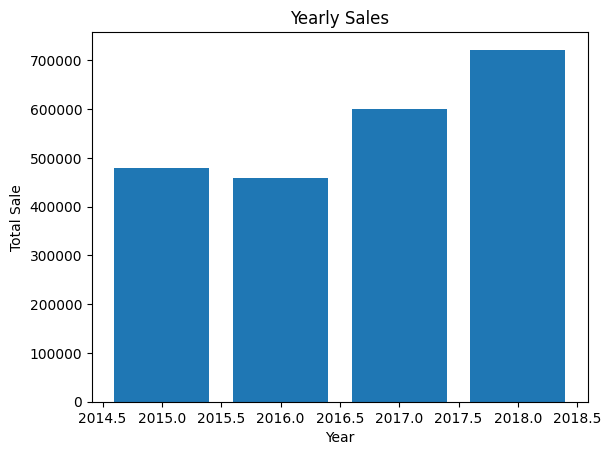

In [39]:
plt.bar(yearly_sales["Year"],yearly_sales["Total Sale"])
plt.title("Yearly Sales")
plt.xlabel("Year")
plt.ylabel("Total Sale")
plt.show()

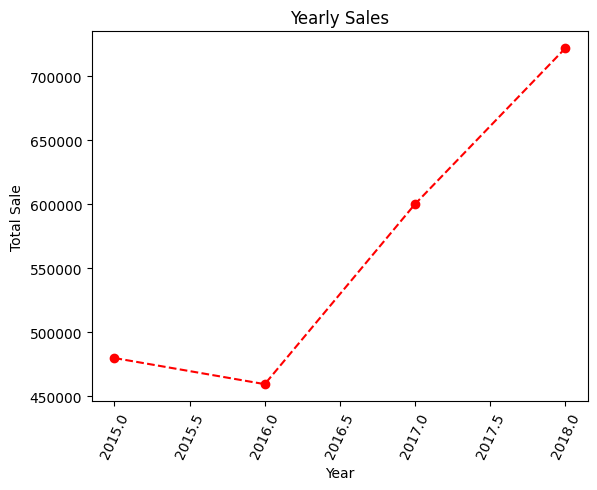

In [40]:
plt.plot(yearly_sales["Year"],yearly_sales["Total Sale"],marker="o",linestyle="--",color="r")
plt.title("Yearly Sales")
plt.xlabel("Year")
plt.ylabel("Total Sale")
plt.xticks(rotation=65)
plt.show()

# Quartely sales


In [41]:
df["Order Date"]=pd.to_datetime(df["Order Date"],dayfirst=True)
yearly_sales=df[df["Order Date"].dt.year==2017]
#calcualte quartely sales for year 2018
querterly_sales=yearly_sales.resample("Q",on="Order Date")["Sales"].sum()
querterly_sales=querterly_sales.reset_index()
querterly_sales=querterly_sales.rename(columns={"Order Date":"Quarter","Sales":"Total Sale"})
print("Quarterly sales for 2017")
querterly_sales

Quarterly sales for 2017


,Quarter,Total Sale
0,2017-03-31,92686.3650
1,2017-06-30,135061.1610
2,2017-09-30,138056.3742
3,2017-12-31,234388.6498


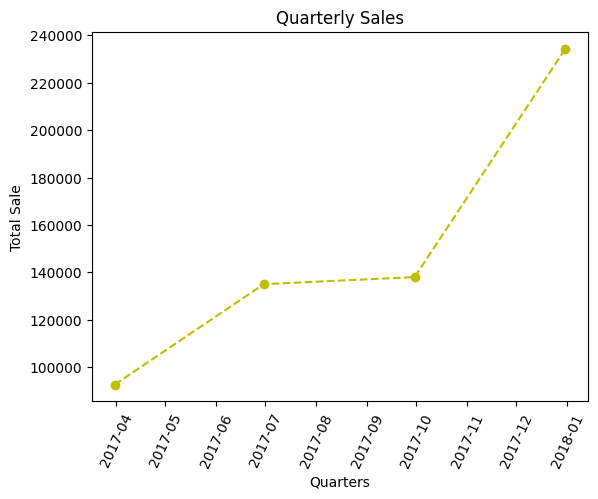

In [42]:
plt.plot(querterly_sales["Quarter"],querterly_sales["Total Sale"],marker="o",linestyle="--",color="y")
plt.title("Quarterly Sales")
plt.xlabel("Quarters")
plt.ylabel("Total Sale")
plt.xticks(rotation=65)
plt.show()

## Monthly sales trend for a year

In [43]:
df["Order Date"]=pd.to_datetime(df["Order Date"],dayfirst=True)
yearly_sales=df[df["Order Date"].dt.year==2018]
monthly_sales=yearly_sales.resample("M",on="Order Date")["Sales"].sum()
monthly_sales=monthly_sales.reset_index()
monthly_sales=monthly_sales.rename(columns={"Order Date":"Month","Sales":"Total Monthly Sales"})
monthly_sales


,Month,Total Monthly Sales
0,2018-01-31,43476.4740
1,2018-02-28,19920.9974
2,2018-03-31,58863.4128
3,2018-04-30,35541.9101
4,2018-05-31,43825.9822
5,2018-06-30,48190.7277
6,2018-07-31,44825.1040
7,2018-08-31,62837.8480
8,2018-09-30,86152.8880
9,2018-10-31,77448.1312


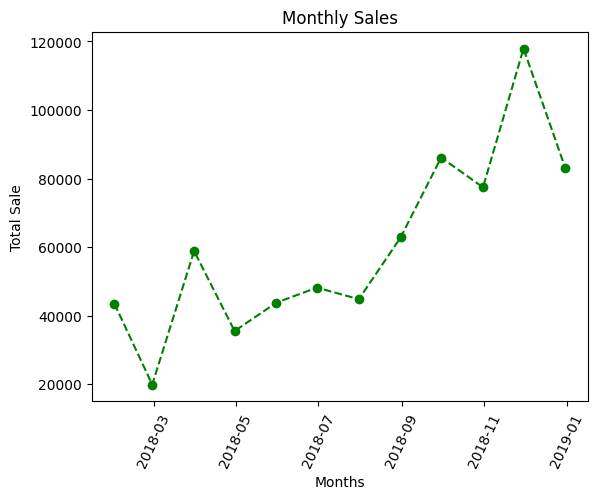

In [44]:
plt.plot(monthly_sales["Month"],monthly_sales["Total Monthly Sales"],marker="o",linestyle="--",color="g")
plt.title("Monthly Sales")
plt.xlabel("Months")
plt.ylabel("Total Sale")
plt.xticks(rotation=65)
plt.show()

# Conclusion

Here I have done one data analysis on a Superstore Sales.
1. Firstly here we can find Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales' diffrent parameters
2. Here we can see the order date is between 2014 to 2018,shipping date is upto 2019.
3. It sales its product in differnt region like South', 'West', 'Central', 'East.
4. It sales its products in diffent states like Kentucky', 'California', 'Florida', 'North Carolina','Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware','Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee','Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio','Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut','New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island','Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland','District of Columbia', 'Kansas', 'Vermont', 'Maine','South Dakota', 'Idaho', 'North Dakota', 'Wyoming','West Virginia.
5. It has expanded its sales to diffent cities like Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord','Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco','Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson','Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover','New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert','Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul', 
6. it has differnt shipping mode like Second Class', 'Standard Class', 'First Class', 'Same Day'.
7. It has differnt types of products.Name of the products are Bush Somerset Collection Bookcase','Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back','Self-Adhesive Address Labels for Typewriters by Universal','Cisco 8961 IP Phone Charcoal', 'Eureka Hand Vacuum, Bagless','LG G2'etc.
8. the products has differnt category and subcategory of the products like Furniture', 'Office Supplies', 'Technology',and the sub categories are Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage','Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper','Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines','Copiers'.
9. Here we can see differnt segment of the customer like Consumer', 'Corporate', 'Home Office'.


After analysing the data we can come into few ponts ,that are:

1.In the customer distribution , we can see that most of the customers are belogns to consumer
segemnt,that is 52.1% and then in second position we can see Corporate ,that is 30.1% and the lowest number of customer are belongs to Home office that is 17.8%

2. According to the sales per customer ,we can see that the 50.8% product is consuming by the Consumer,30.4% by corporate and 18.8% by the Home office.

3. The highest sales has been done with the Consumer and the lowest with Home office.

4.To determine the most loyal customers, we can look for individuals who consistently appear at the top of both the order frequency and sales lists. These customers demonstrate loyalty by not only making frequent purchases but also contributing significantly to our revenue. Therefore we can see that the consumers are the most loyal customer of this Superstore and the home office and corporates are not lat much loyal to that superstore .

5. Here in the mode of shipping we can see that the most popular shipping method is Standard class and most unpopular shipping method is same day.
 
6. People use standard class 59.8%,second class 19.4% ,first class 15.3% and same day 5.5% for shipping the products.

7. The highest number of customers are present in California state that is 1946 and the lowest number of customers present in Washington state thatis 504.

8.the highest number of customers are present in New York city that is 891 and the lowest number of customers present in Seattle is 426.

9.The Highest sales of this superstore can be seen in California that is 446306.4635 and lowest sale is seen in North Dakota that is 919.9100

10. Here we can see diffrent sub categories of the product category.The highest sub category present in Office Supplies category , and the lowest sub categorypresent in Technology category.

11.The Technology category has the highest sales, that is 827455.8730 and the office supplies has lowest sales that is 705422.340.

12. Technology category product sales 36.6%, furniture product sales 32.2% and office supplies sales 31.2%.

13.In the subcategories we can see,Phones are sold in the highest amount,that is 327782.4480 and theFasteners are sold in the lowest amount that is 3001.9600.

14. The highest total sale can be seen in the year 2018 that is 722052.0192 and the lowest total sale is seen in 2016, that is 459436.0054.

16. In the yearly sales graph ,we can see that the sale of products was low in 2015 to 2016 ,and after 2016 the sale has increased and we can see the highest sale in 2018.

17.In Quaterly sale of 2017,we can see that , highest sale can be seen in 2017,in the month of december that is 234388.6498 and the lowest sale is seen in the month of march of 2017 thatbis 92686.3650.

18. In the graph we can see,the sale is increasing in the month of april to july of 2017,the we can see moderate sale in the month of july to october,then the sale is increased from october to december.

19. We can see that in 2018, the highest monthly sale is seen in the month of november that is 117938.1550 and the lowest sale is seen in month of february that is 19920.9974.

so at the end we can conclude that the sale is continuously changing and it is increasing from the end of 2017  to 2018.The most contributed customer of this superstore is consumer we consumes the maximum amount of product. So we can see that the Superstore is doing average to good quality of business in the differnt region of the world,with differnt types of product,with differnt categories and sub categories. 